In [39]:
%load_ext autoreload
%autoreload 1

import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append('../../src')

from data.fetch_data import get_submission_docs_for_subreddit
from data.clean_data import process_text
from model import topics

%aimport data.fetch_data
%aimport data.clean_data
%aimport model.topics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pickle
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize, MWETokenizer # multi-word expression
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.chunk import ne_chunk
from nltk.tag import pos_tag
from gensim import corpora, models, similarities, matutils

import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [4]:
data_raw_warren = get_submission_docs_for_subreddit('ElizabethWarren')

Percent of comments by most prolific user: 0.029133711485712765


In [5]:
data_raw_sanders = get_submission_docs_for_subreddit('SandersForPresident')

Percent of comments by most prolific user: 0.007028034571348654


In [6]:
data_raw_biden = get_submission_docs_for_subreddit('JoeBiden')

Percent of comments by most prolific user: 0.03593855666119215


In [7]:
data_raw_pete = get_submission_docs_for_subreddit('Pete_Buttigieg')

Percent of comments by most prolific user: 0.022478054257038606


## Load Doc Topics for rDemocrats

In [18]:
with open('../../data/interim/rDemocrats_doc_topic_labeled.pickle', 'rb') as read_file:
    doc_topic_dems = pickle.load(read_file)

## Label Candidate Subreddits

In [49]:
warren_labeled_2 = topics.process(data_raw_warren)

In [50]:
sanders_labeled_2 = topics.process(data_raw_sanders)

In [51]:
pete_labeled_2 = topics.process(data_raw_pete)

In [52]:
biden_labeled_2 = topics.process(data_raw_biden)

## Get Topic Distribution for Subreddit

In [53]:
def compare_candidates(df1, df2, legend_labels):
    plt.figure(figsize=(20, 10))

    plt.ylim((0, 0.6))
    plt.hist(df1.topic_label, alpha=0.4, bins=19, range=(0, 19), density=True, align="left")
    plt.hist(df2.topic_label, alpha=0.4, bins=19, range=(0, 19), density=True, align="left")
    plt.xticks(rotation=90, fontsize=30)
    plt.legend(legend_labels, fontsize=30);

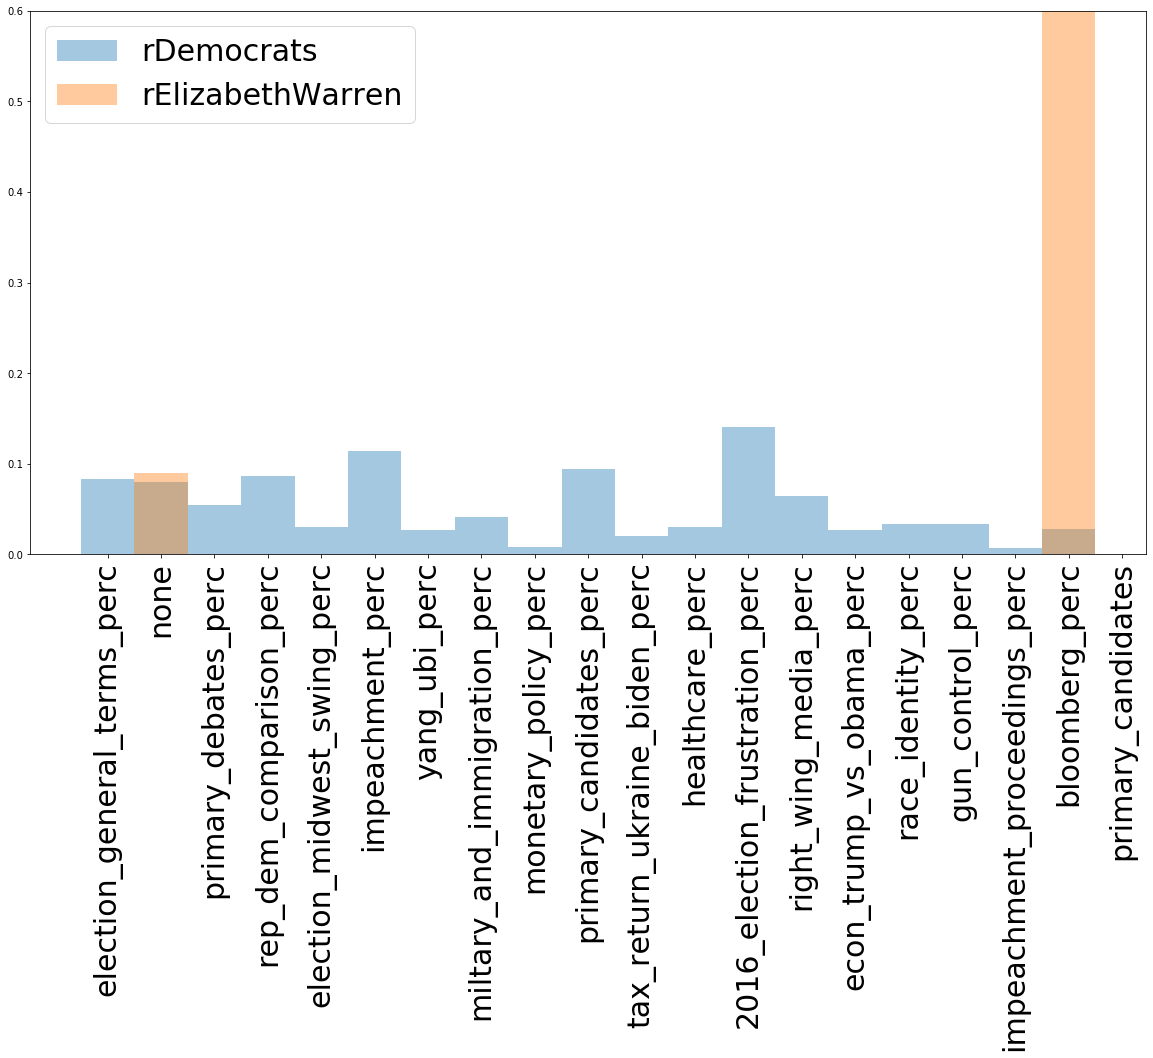

In [54]:
compare_candidates(dems_labeled, warren_labeled_2, ['rDemocrats', 'rElizabethWarren'])

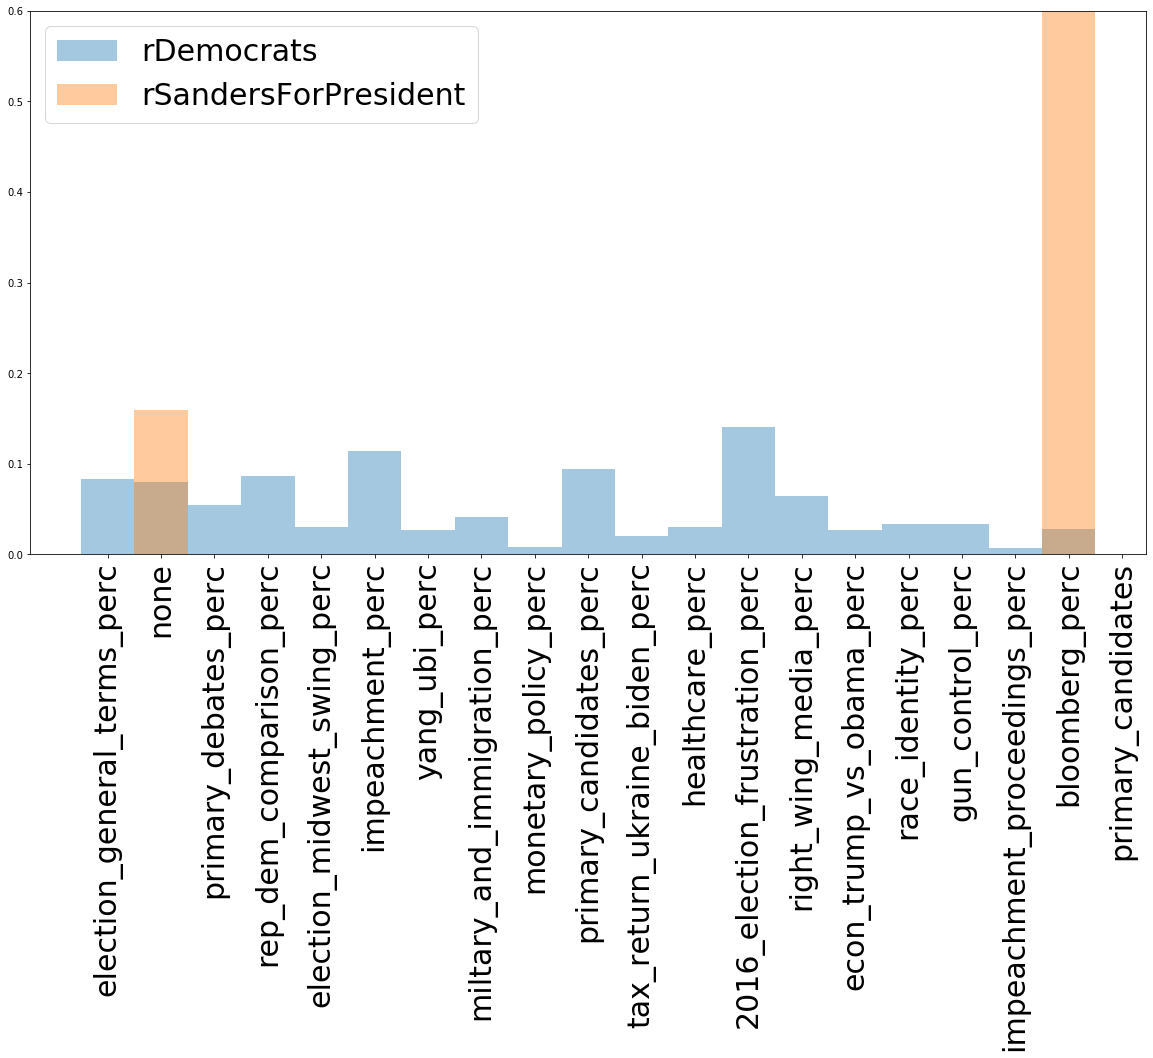

In [55]:
compare_candidates(dems_labeled, sanders_labeled_2, ['rDemocrats', 'rSandersForPresident'])

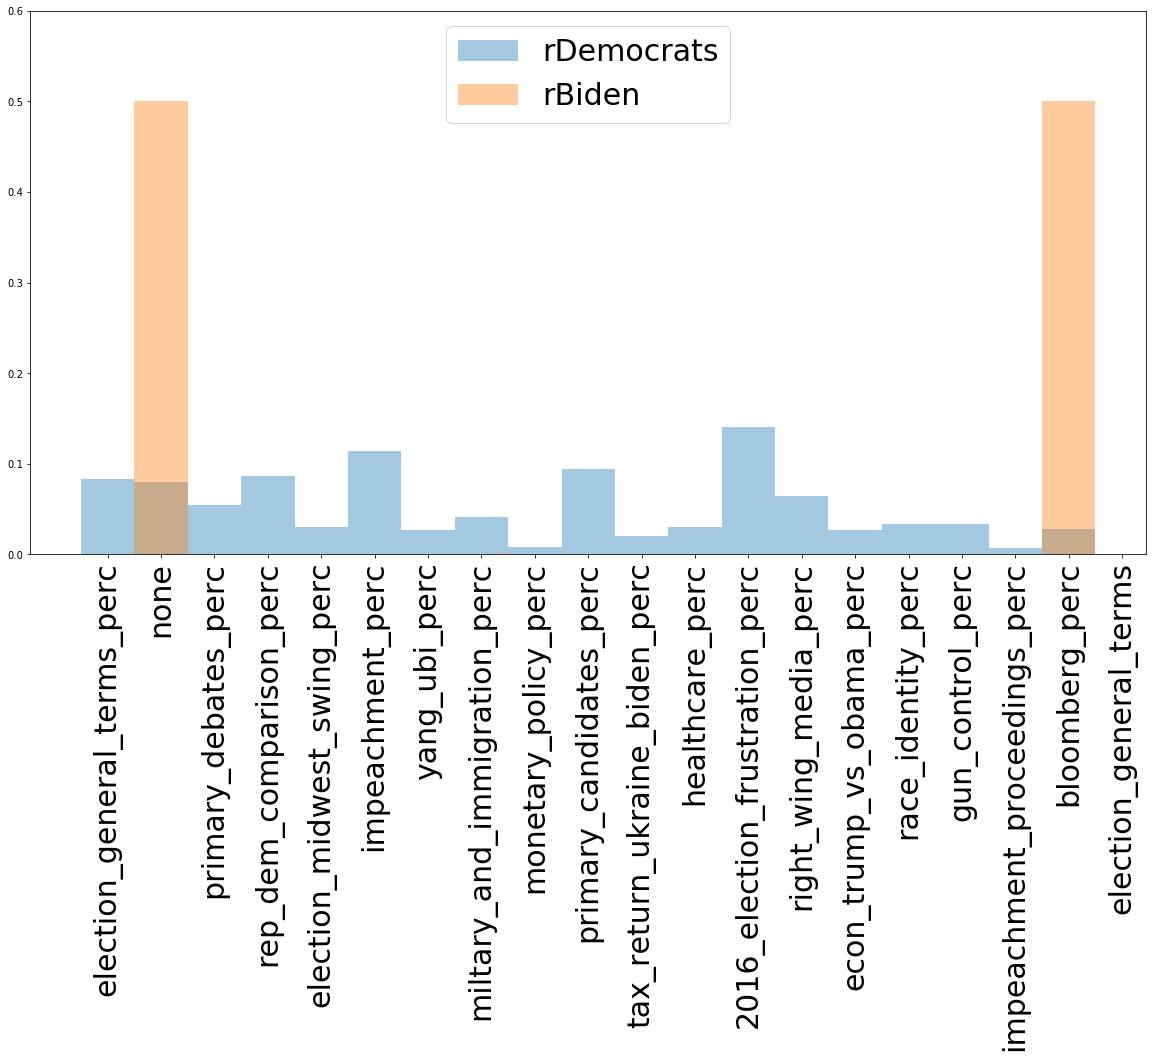

In [56]:
compare_candidates(dems_labeled, biden_labeled_2, ['rDemocrats', 'rBiden'])

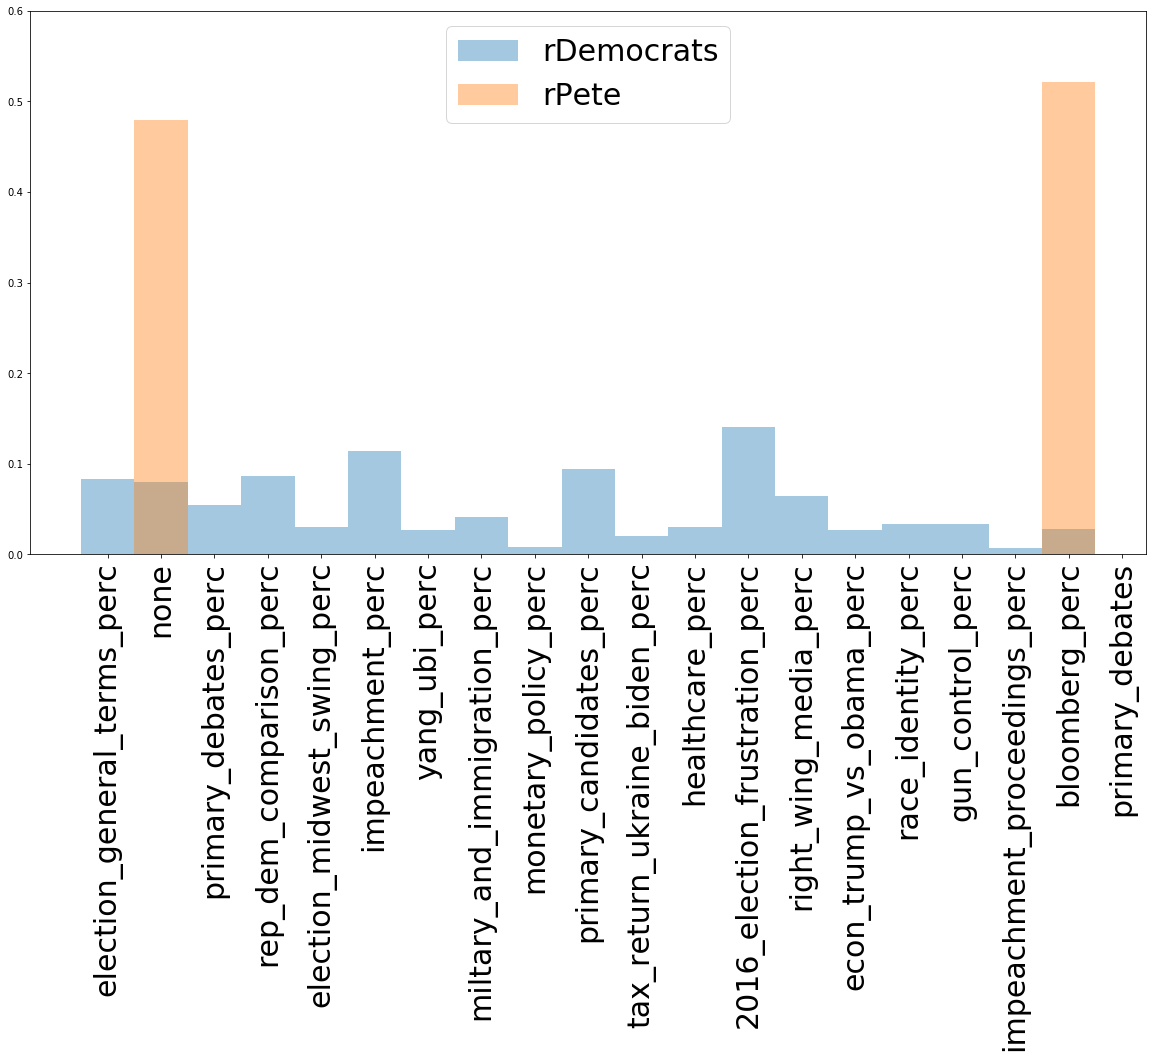

In [57]:
compare_candidates(dems_labeled, pete_labeled_2, ['rDemocrats', 'rPete'])

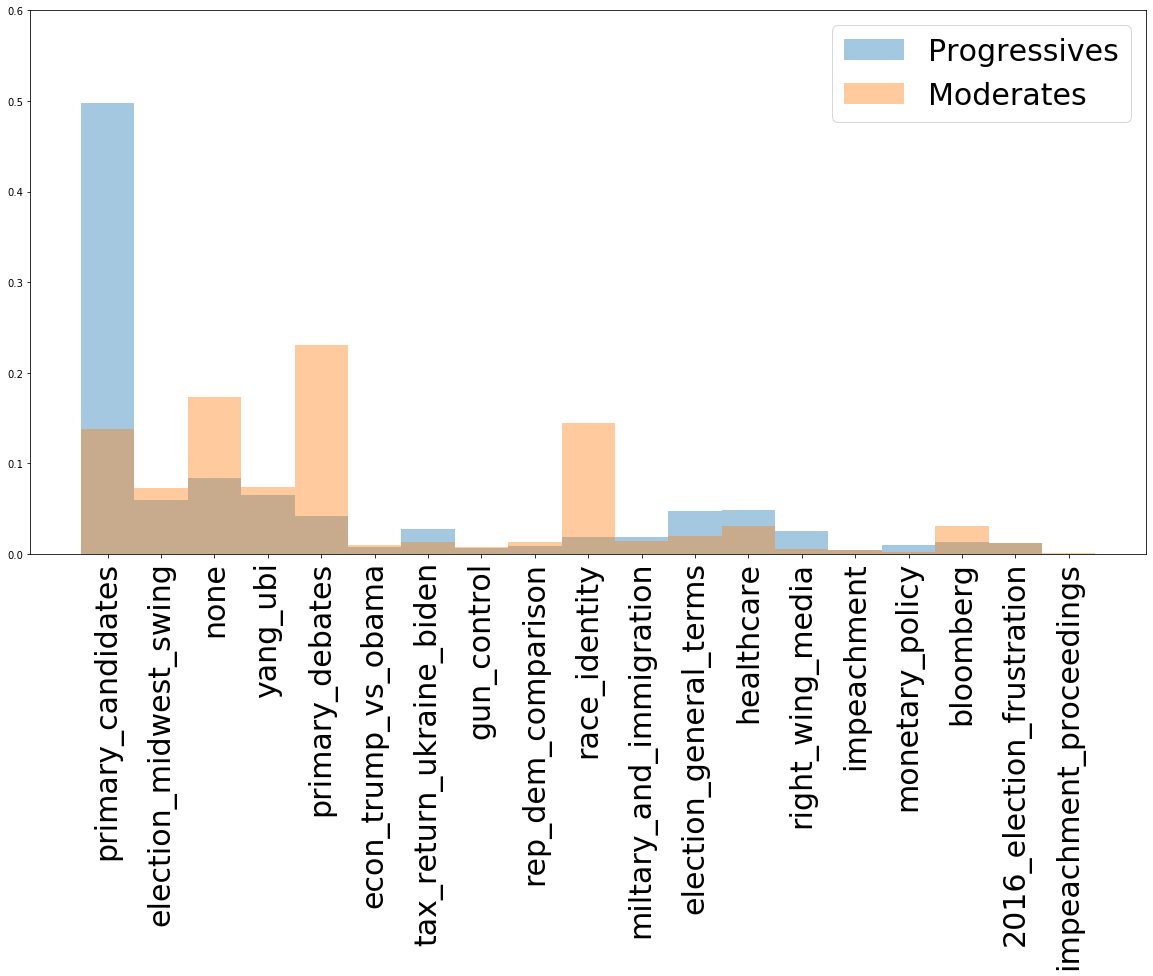

In [58]:
compare_candidates(
    pd.concat([warren_labeled_2, sanders_labeled_2]), 
    pd.concat([biden_labeled_2, pete_labeled_2]),
    ['Progressives', 'Moderates']
)